In [1]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib import animation, rc

In [2]:
global x
h = 1
tau = 0.05
x = np.arange(0, 100+h, h)
t = np.arange(0, 1001*tau, tau)

def mu2(x):
    return [1/(1 + ((t-50)/10)**4) for t in x]
def f(t, x):
    return 0

In [3]:
global u
u = np.zeros((len(t), len(x)))
u[0] = mu2(x)
for i in range(len(t)):
    u[i][0] = u[0][0]

In [4]:
for i in range(1, len(t)):
    for j in range(1, len(x)):
        u[i][j] = (-2*h + sqrt(4*h**2+4*tau*(2*h*u[i-1][j]+tau*u[i-1][j-1]*u[i-1][j-1])))/(2*tau)

<IPython.core.display.Javascript object>


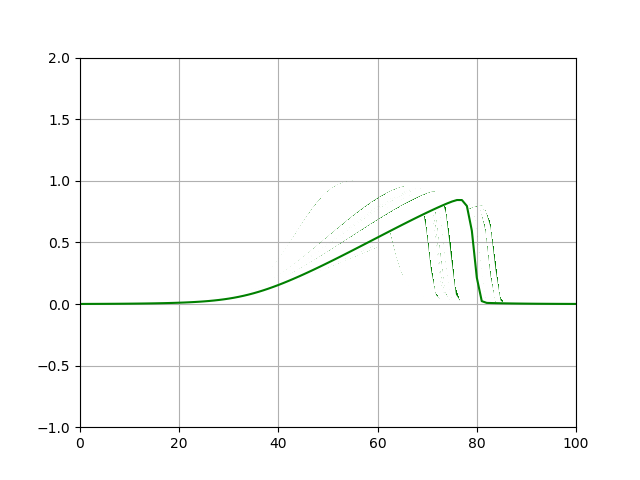

In [5]:
from matplotlib import pyplot as plt
from matplotlib import animation
%matplotlib notebook
fig, ax = plt.subplots()
ax.set_xlim(0,100)
maxv=-1e10
minv=1e10
minv = [min(minv,min(t)) for t in u]
minv=min(minv)
maxv = [max(maxv,max(t)) for t in u]
maxv=max(maxv)
ax.set_xlim(0,100)
ax.set_ylim(minv-1,maxv+1)
ax.grid(True)
line, = plt.plot(x, u[0], color='g')
def animate(n):
    #line, = plt.plot(x, u[n], color='g')
    line.set_data(x, u[n])
    return line,
anim = animation.FuncAnimation(fig, animate, frames=len(t), interval=10)
plt.show()